### Drug Dosage - Repeated Doses

* model the metabolic system
* simplified one-compartment model
* **concentration** of drug - drug/volume of blood
* rate of elimination is proportional to amount in system
* **MEC** minimum effective concentrations
* **MTC** minimum toxic concentrations
* **therapeutic range** in between MEC and MTC
* model in terms of drugs **half-life** and amount of **plasma** in blood

* drug is Dilantin - treatment for epilepsy
* patients take 100-mg tablet, three times daily
* effective serum blood level is 10-20 $\mu g/ml$
* side effects can appear at 20 $\mu g/ml$
* half-life averages 22 hours

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# ordinary variables first (circles with no incoming arrows)

# constants
half_life = 22 # hours
plasma_volume = 3000 # ml
interval = 8
absorption_fraction = .12
min_effective = 10
min_toxic = 20
time_start = 0

# derived variables
elimination_constant = -np.log(.5) / half_life

# array for a stock variable
drug_in_system = np.zeros(100)
# set its initial value
dosage = 100 * 1000
initial_drug = 0

# there are no other circles that are pointed to by anything other than a circle

In [11]:
def pulse(t, dosage):
    if np.allclose(t % 8, 0):
    #if np.allclose(np.ceil(t) % 8, 0) and np.allclose(t, np.ceil(t)):
        return dosage
    else:
        return 0

In [18]:
dt = 0.5
time_points = np.arange(time_start, 169, dt)

In [19]:
Q = np.zeros_like(time_points)

for i in range(len(time_points)-1):
    t = time_points[i]
    entering = absorption_fraction * pulse(t, dosage)
    leaving = -elimination_constant * Q[i] * dt
    Q[i+1] = Q[i] + entering + leaving

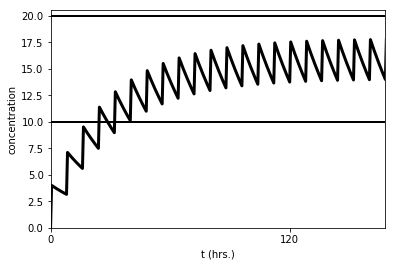

In [20]:
fig, ax = plt.subplots(subplot_kw=dict(ylabel="concentration", xlabel="t (hrs.)"))
ax.plot(time_points, Q/plasma_volume, color='k', lw=3)
ax.hlines(min_effective, time_points[0], 
          time_points[-1], color='k',
          lw=2)
ax.hlines(min_toxic, time_points[0], 
          time_points[-1], color='k',
          lw=2)
ax.xaxis.set_ticks(time_points[::80*3])
ax.grid(False)
ax.set_xlim(0, 168);
ax.set_ylim(0, 20.5);
plt.show()